## Import Libraries

In [1]:
#Using Numpy and Pandas for Data Processing
import numpy as np
import pandas as pd

## Load Dataset

In [2]:
data = pd.read_csv('Customers.csv') 
data.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


## Statistic Information of Dataset

In [3]:
data.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [4]:
data.max()

C:\Users\Kevin Yu\AppData\Local\Temp\ipykernel_8852\2904433368.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.max()


CustomerID                  2000
Gender                      Male
Age                           99
Annual Income ($)         189974
Spending Score (1-100)       100
Work Experience               17
Family Size                    9
dtype: object

In [5]:
data.min()

C:\Users\Kevin Yu\AppData\Local\Temp\ipykernel_8852\927168777.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.min()


CustomerID                     1
Gender                    Female
Age                            0
Annual Income ($)              0
Spending Score (1-100)         0
Work Experience                0
Family Size                    1
dtype: object

## Histogram for Continuous Variables

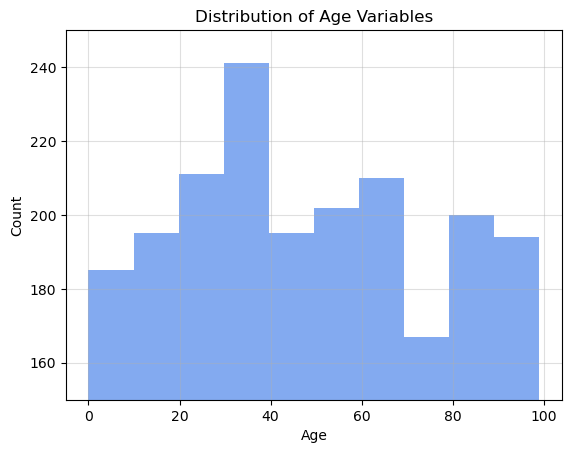

In [6]:
import matplotlib.pyplot as plt
plt.hist(data['Age'], color = 'cornflowerblue', alpha = 0.8)
plt.ylim(150, 250)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age Variables')
plt.grid(alpha = 0.4)

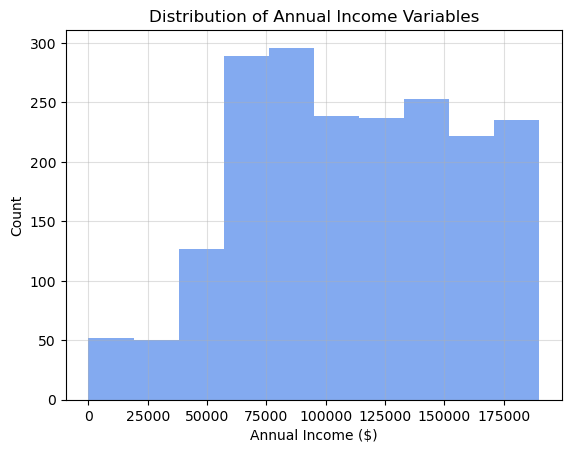

In [7]:
plt.hist(data['Annual Income ($)'], color = 'cornflowerblue', alpha = 0.8)
plt.xlabel('Annual Income ($)')
plt.ylabel('Count')
plt.title('Distribution of Annual Income Variables')
plt.grid(alpha = 0.4)

## Distribution of Discrete Variables

### Step1: Fill Missing Values

In [30]:
data['Profession'].unique()
data = data.dropna()

### Step2: Count Different Values of Discrete Variables

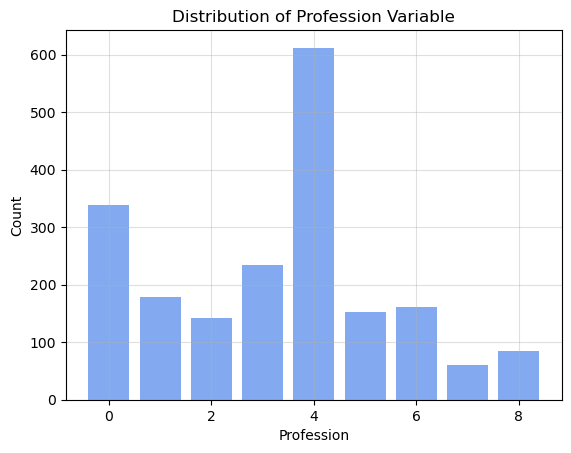

In [31]:
distribution = []
all_profession = data['Profession'].unique()
for p in all_profession:
    num = len(data[data['Profession'] == p])
    distribution.append(num)
plt.bar(x = range(len(distribution)), height = distribution, color = 'cornflowerblue', alpha = 0.8)
plt.xlabel('Profession')
plt.ylabel('Count')
plt.title('Distribution of Profession Variable')
plt.grid(alpha = 0.4)

### Step3: How to Draw Discrete Variables?

In [32]:
def distribution_function(dataset, cat_name):
    distribution = []
    all_cat = dataset[cat_name].unique()
    for cat in all_cat:
        num = len(dataset[dataset[cat_name] == cat])
        distribution.append(num)
    plt.bar(x = range(len(distribution)), height = distribution, color = 'cornflowerblue', alpha = 0.8)
    plt.xlabel(cat_name)
    plt.ylabel('Count')
    plt.title('Distribution of' + cat_name + 'Variable')
    plt.grid(alpha = 0.4)
    ##plt.savefig('{}.png'.format(cat_name))

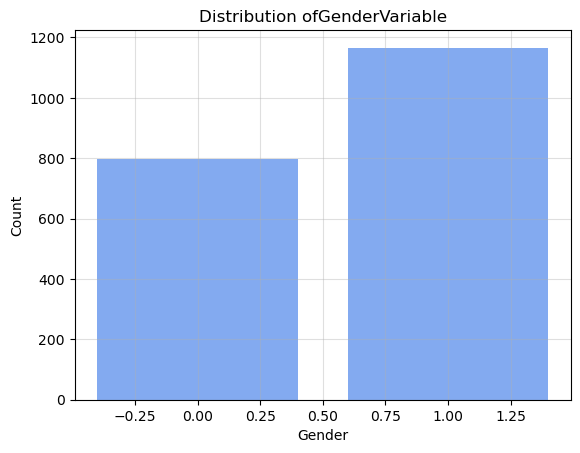

In [33]:
distribution_function(data, 'Gender')

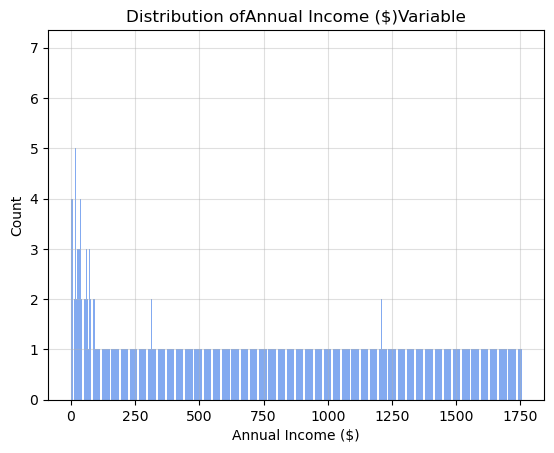

In [34]:
distribution_function(data, 'Annual Income ($)')

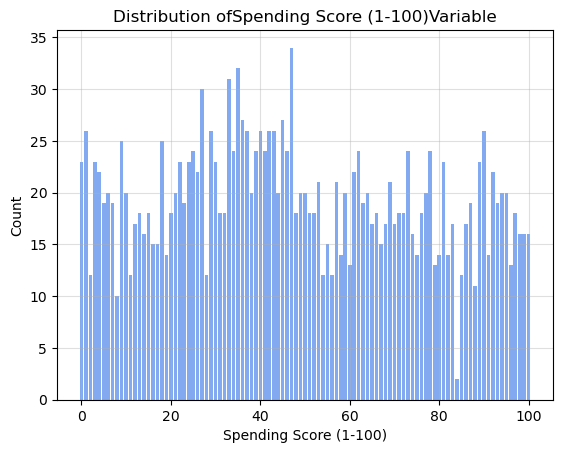

In [35]:
distribution_function(data, 'Spending Score (1-100)')

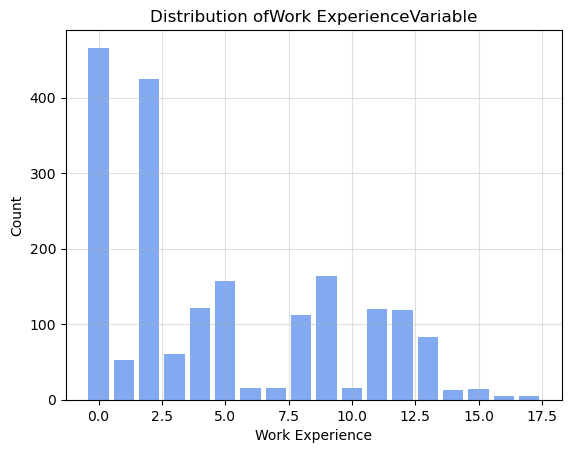

In [36]:
distribution_function(data, 'Work Experience')

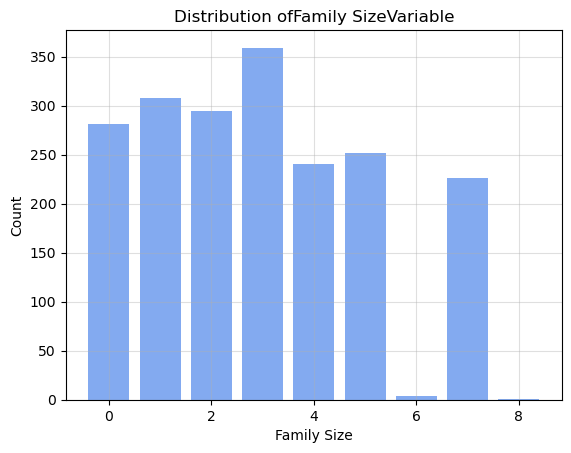

In [37]:
distribution_function(data, 'Family Size')

## Plot Distribution of Group Variables

([<matplotlib.axis.XTick at 0x1caee9a4940>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

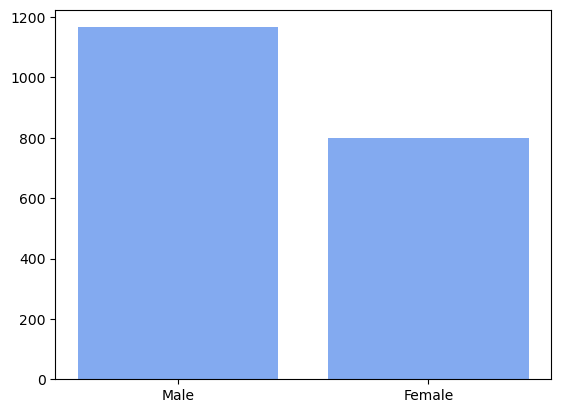

In [178]:
group1 = data.groupby('Gender')
datas = []
for item in group1:
    key, items = item
    datas.append(len(items['Gender']))
plt.bar(x = range(len(datas)), height = datas, color = 'cornflowerblue', alpha = 0.8)
plt.xticks([0, 1], ['Male', 'Female'])

## Pearson Correlation of the Dataset

In [39]:
data.corr()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
CustomerID,1.000000,0.074915,0.329822,0.014387,0.092284,0.163545
Age,0.074915,1.000000,0.021064,-0.037387,-0.016771,0.034810
Annual Income ($),0.329822,0.021064,1.000000,0.026716,0.087135,0.093757
Spending Score (1-100),0.014387,-0.037387,0.026716,1.000000,-0.025587,0.005859
Work Experience,0.092284,-0.016771,0.087135,-0.025587,1.000000,0.012727
Family Size,0.163545,0.034810,0.093757,0.005859,0.012727,1.000000


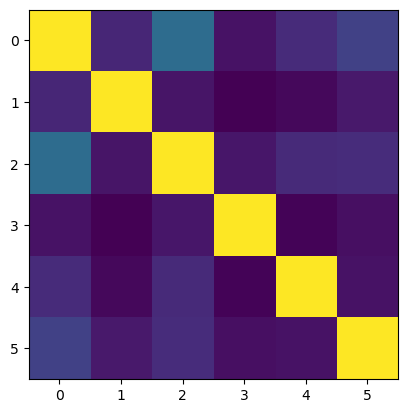

In [40]:
plt.imshow(data.corr())

C:\Users\Kevin Yu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kevin Yu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kevin Yu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

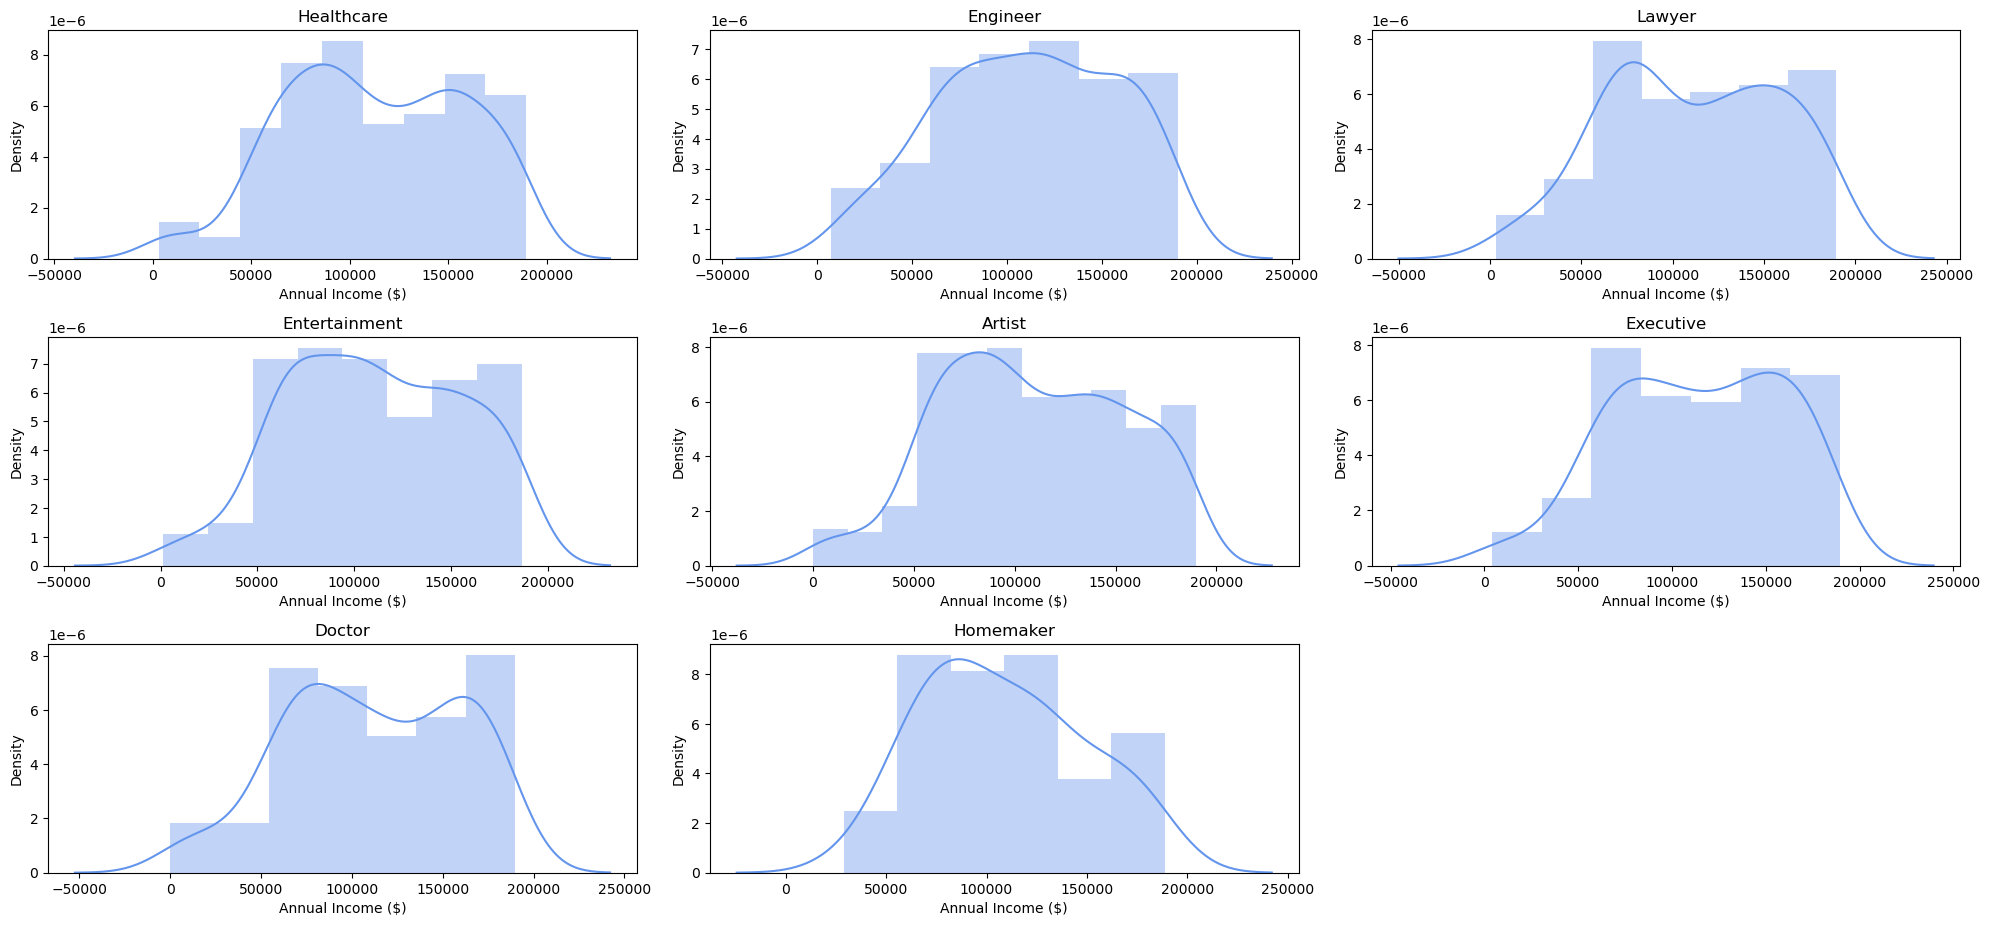

In [41]:
import seaborn as sns
list_of_profession = list(data['Profession'].unique() )
del list_of_profession[-1]  #delete nan value
plt.figure(figsize = (20, 12));
number = 1
#row = 4
for i in list_of_profession:
    data_profession = data[data.Profession == i]
    plt.subplot(4, 3, number)
    sns.distplot(data_profession['Annual Income ($)'], color = 'cornflowerblue')
    number += 1
    plt.title(i)
    plt.tight_layout();

## Make Predictions Through Linear Regression

In [193]:
def plot_model(model, x, y):
    y_hat = model.predict(x)
    plt.scatter(range(len(y_hat)), y_hat)
    plt.scatter(range(len(y)), y)

In [205]:
from sklearn import linear_model
def LinearRegression(model_x, model_y):
    x = model_x
    y = model_y
    print(x.shape, y.shape)
    
    model = linear_model.LinearRegression()
    model.fit(x, y)
    
    print('value of w is', model.coef_)
    print('value of b is', model.intercept_)
    print(model.score(x, y))
    
    return model

(1965, 8)
(1965, 6) (1965, 1)
value of w is [[ 0.00443006 -0.0401922   0.03025239 -0.04861921 -0.02947625  0.00651155]]
value of b is [1.11502667e-16]
0.0053774106541657485


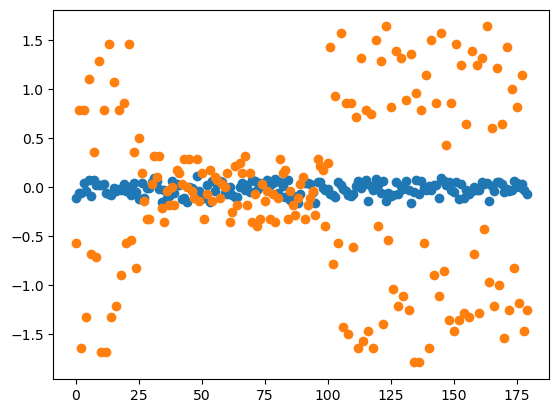

In [217]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x = data['Gender']
y = label_encoder.fit_transform(x)
data['Gender'] = y

label_encoder = LabelEncoder()
x = data['Profession']
y = label_encoder.fit_transform(x)
data['Profession'] = y

from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 1., -1.,  2.],
                     [ 2.,  0.,  0.],
                     [ 0.,  1., -1.]])
scaler = preprocessing.StandardScaler().fit(data)
data_scaled = scaler.transform(data)

print(data_scaled.shape)

model = LinearRegression(data_scaled[:, [1, 2, 3, 5, 6, 7]], data_scaled[:, [4]])
plot_model(model, data_scaled[:, [1, 2, 3, 5, 6, 7]][20:200], data_scaled[:, [4]][20:200])